In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [6]:
data = pd.read_csv('../Customer-Churn-Records.csv')

In [7]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [8]:
# 데이터 기본 정보 확인용
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

print()
print("데이터 유형: ")

print(data.dtypes)

Number of rows: 10000
Number of columns: 18

데이터 유형: 
RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


# 신용점수

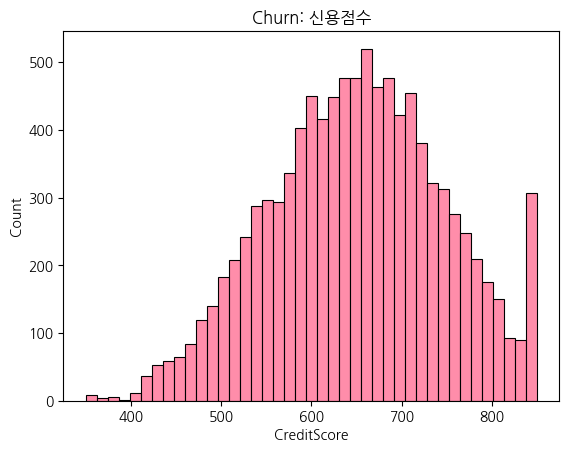

In [9]:
sns.histplot(x = data['CreditScore'], kde = False, color='#FF678E')
plt.title('Churn: 신용점수')
plt.show()

500 점대 후반에서 700점대 초반의 신용점수를 가진 고객들이 많이 분포되어 있는 것을 확인

<Axes: title={'center': 'Boxplot: 신용점수'}, xlabel='Exited', ylabel='CreditScore'>

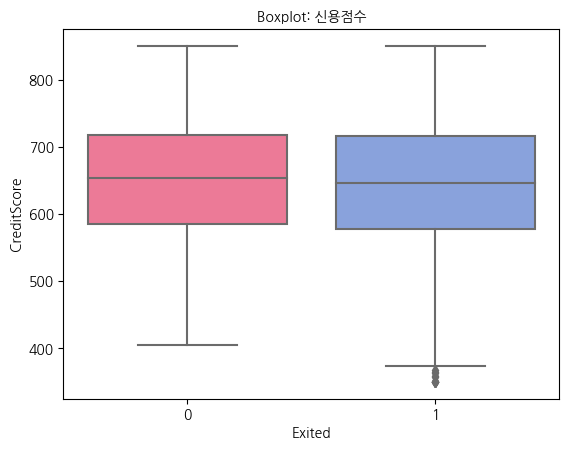

In [10]:
plt.title("Boxplot: 신용점수", fontdict = {'fontsize': 10})
sns.boxplot(x="Exited", y="CreditScore",  palette = ['#FF678E',"#7B9CEA"], data=data)

Boxplot에서 outlier 가 발견

In [11]:
# 아웃라이어 확인용
data["CreditScore"].sort_values(ascending=False).tail()

8762    350
1631    350
9624    350
1838    350
8723    350
Name: CreditScore, dtype: int64

# 나라

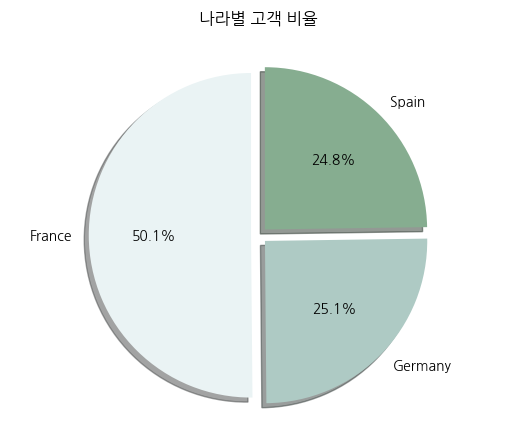

In [12]:
colors = ['#EAF3F4', '#AECAC4', '#86AD90']
explode = [0.05, 0.05, 0.05]


geography_counts = data['Geography'].value_counts()
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%',startangle=90, colors=colors,explode=explode, shadow=True)
plt.axis('equal')
plt.title('나라별 고객 비율', pad=20)
plt.show()

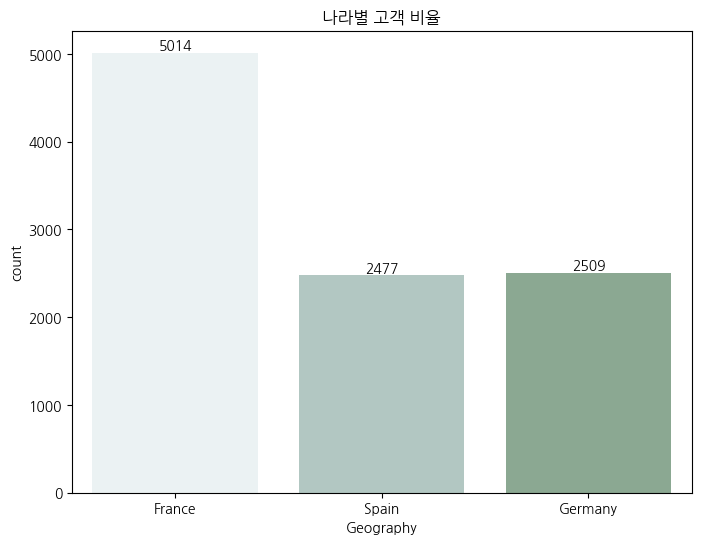

In [13]:
# 나라 비율
plt.figure(figsize=(8, 6))
geo_ratio = sns.countplot(x='Geography', palette=['#EAF3F4', '#AECAC4', '#86AD90'], data=data)
for label in geo_ratio.containers:
    geo_ratio.bar_label(label)
plt.title('나라별 고객 비율')
plt.show()

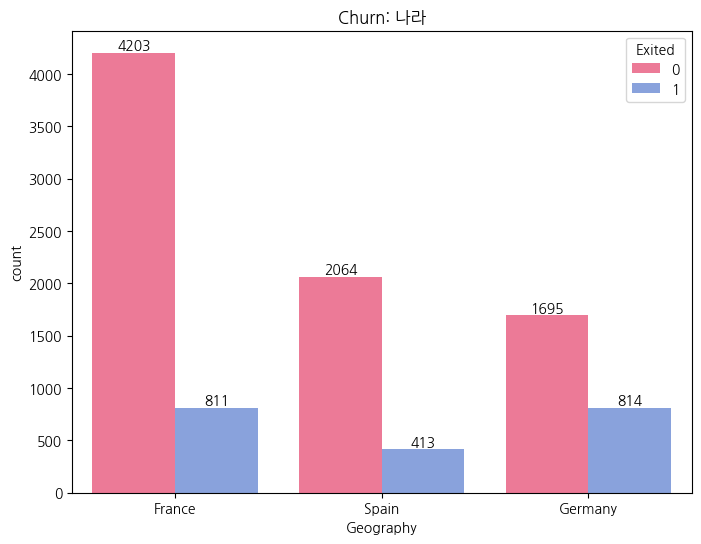

In [14]:
# Churn: 나라
plt.figure(figsize=(8, 6))
geo_plot = sns.countplot(x='Geography', hue = 'Exited', palette = ['#FF678E',"#7B9CEA"], data=data)
for label in geo_plot.containers:
    geo_plot.bar_label(label)
plt.title('Churn: 나라')
plt.show()

In [15]:
churn_rate_geography = data.groupby('Geography')['Exited'].mean()
print(churn_rate_geography)

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


위 그래프를 통해 프랑스와 스페인은 고객의 약 16~17% 정도가 독일은 약 32%의 고객이 이탈한 것을 확인할 수 있다.

# 성별

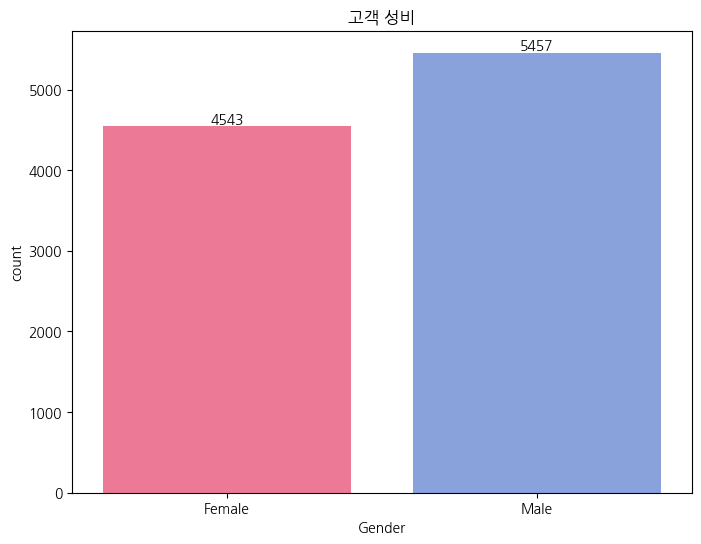

In [16]:
# Churn: 성별
plt.figure(figsize=(8, 6))
gender_plot = sns.countplot(x='Gender', palette=['#FF678E',"#7B9CEA"], data=data)
for label in gender_plot.containers:
    gender_plot.bar_label(label)
plt.title('고객 성비')
plt.show()

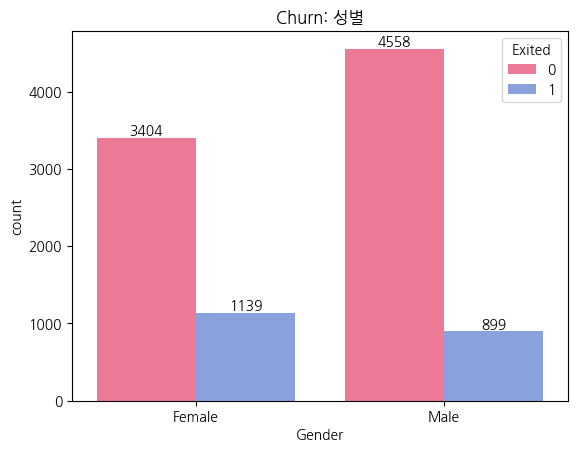

In [17]:
# Churn: 성별
plt.gca().set_title('Churn: 성별')
churn_gender = sns.countplot(x = 'Gender', hue = 'Exited', palette = ['#FF678E',"#7B9CEA"], data = data)
for label in churn_gender.containers:
    churn_gender.bar_label(label)

In [18]:
churn_rate_gender = data.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


위 그래프를 통해 여성 고객의 약 25% 와 남성 고객의 약 16% 정도가 이탈한다는 것을 확인할 수 있다.
이탈률이 크게 차이나지 않는 것으로 보아 성별은 은행 이탈률에 크게 영향을 주지않는다는 것을 알 수 있다.
 